In [ ]:
# ============================================================================
# PCA GAIT ANALYSIS
# ============================================================================

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import os

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)


DATA_DIR = '/content/drive/MyDrive/estimatedH/estimatedH'

if os.path.exists(DATA_DIR):
    sample_files = os.listdir(DATA_DIR)[:5]
    print(f"  Sample files: {sample_files}")
else:
    print("  Please update DATA_DIR to point to your estimatedH/estimatedH folder")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✓ Dataset directory found: /content/drive/MyDrive/estimatedH/estimatedH
  Sample files: ['estimatedH.zip', 'c1_RightAnkle.csv', 'c2_RightAnkle.csv', 'c10_LeftKnee.csv', 'c1_RightHip.csv']


In [ ]:
# ============================================================================
# Feature Extraction
# ============================================================================

def extract_features_from_timeseries(df, column_name='Angle'):
    """
    Extract summary statistics from a time series of joint angles.

    Returns 6 features: mean, std, min, max, range, median
    """
    values = df[column_name].values

    features = {
        'mean': np.mean(values),
        'std': np.std(values),
        'min': np.min(values),
        'max': np.max(values),
        'range': np.max(values) - np.min(values),
        'median': np.median(values)
    }

    return features

def load_participant_data(participant_id, data_dir):
    """
    Load all data for a single participant.
    Returns a dictionary with features and metadata.
    """
    # Joint angle files
    joints = ['LeftAnkle', 'LeftHip', 'LeftKnee', 'RightAnkle', 'RightHip', 'RightKnee', 'Torso']

    features = {}

    # Extract features from each joint
    for joint in joints:
        filepath = os.path.join(data_dir, f'{participant_id}_{joint}.csv')
        if os.path.exists(filepath):
            df = pd.read_csv(filepath)
            joint_features = extract_features_from_timeseries(df)

            # Add to features dict with descriptive names
            for stat_name, stat_value in joint_features.items():
                features[f'{joint}_{stat_name}'] = stat_value

    # Load metadata (height, stride length)
    metadata_path = os.path.join(data_dir, f'{participant_id}_metadata.csv')
    if os.path.exists(metadata_path):
        metadata_df = pd.read_csv(metadata_path)
        metadata_dict = dict(zip(metadata_df['Field'], metadata_df['Value']))

        features['Height'] = float(metadata_dict.get('HeightInches', 0))
        features['StrideLengthAvg'] = float(metadata_dict.get('StrideLengthAvg', 0))

    # Add participant info
    features['ParticipantID'] = participant_id
    features['Group'] = 'Control' if participant_id.startswith('c') else 'Impaired'

    return features

print("Loading participant data...")

all_participants = []

# Control group (c1-c10)
for i in range(1, 11):
    pid = f'c{i}'
    try:
        data = load_participant_data(pid, DATA_DIR)
        all_participants.append(data)
        print(f"✓ Loaded {pid}")
    except Exception as e:
        print(f"✗ Failed to load {pid}: {e}")

# Impaired group (i1-i10)
for i in range(1, 11):
    pid = f'i{i}'
    try:
        data = load_participant_data(pid, DATA_DIR)
        all_participants.append(data)
        print(f"✓ Loaded {pid}")
    except Exception as e:
        print(f"✗ Failed to load {pid}: {e}")

# Create DataFrame
df_full = pd.DataFrame(all_participants)
print(f"\n✓ Loaded {len(df_full)} participants total")
print(f"  Control: {len(df_full[df_full['Group'] == 'Control'])}")
print(f"  Impaired: {len(df_full[df_full['Group'] == 'Impaired'])}")

# Display sample
print("\nSample of extracted features:")
print(df_full.head())


Loading participant data...
✓ Loaded c1
✓ Loaded c2
✓ Loaded c3
✓ Loaded c4
✓ Loaded c5
✓ Loaded c6
✓ Loaded c7
✓ Loaded c8
✓ Loaded c9
✓ Loaded c10
✓ Loaded i1
✓ Loaded i2
✓ Loaded i3
✓ Loaded i4
✓ Loaded i5
✓ Loaded i6
✓ Loaded i7
✓ Loaded i8
✓ Loaded i9
✓ Loaded i10

✓ Loaded 20 participants total
  Control: 10
  Impaired: 10

Sample of extracted features:
   LeftAnkle_mean  LeftAnkle_std  LeftAnkle_min  LeftAnkle_max  \
0       16.438945       7.083286          1.750      32.152000   
1       16.132968       8.135565         -2.254      41.270000   
2       18.667467       8.338495          6.424      36.002000   
3       18.424545       7.629078          2.886      37.106000   
4       15.059059       5.402258          4.346      24.668001   

   LeftAnkle_range  LeftAnkle_median  LeftHip_mean  LeftHip_std  LeftHip_min  \
0        30.402000         16.296999     11.817446     6.641873        1.692   
1        43.524000         15.650000     11.503164     6.855632        2.080   
2


FEATURE CONFIGURATIONS

Config 1: Knees + Stride (Original): 13 features
  Features: ['LeftKnee_mean', 'LeftKnee_std', 'LeftKnee_min']... (+10 more)

Config 2: All Joints + Stride: 44 features
  Features: ['LeftAnkle_mean', 'LeftAnkle_std', 'LeftAnkle_min']... (+41 more)

Config 3: All Joints Only: 42 features
  Features: ['LeftAnkle_mean', 'LeftAnkle_std', 'LeftAnkle_min']... (+39 more)

Config 4: Knee Range Only: 3 features
  Features: ['LeftKnee_range', 'RightKnee_range', 'StrideLengthAvg']... (+0 more)

Config 5: Knee Mean + Std: 5 features
  Features: ['LeftKnee_mean', 'RightKnee_mean', 'LeftKnee_std']... (+2 more)

Config 6: Ankles + Stride: 13 features
  Features: ['LeftAnkle_mean', 'LeftAnkle_std', 'LeftAnkle_min']... (+10 more)

Config 7: Hips + Stride: 13 features
  Features: ['LeftHip_mean', 'LeftHip_std', 'LeftHip_min']... (+10 more)

Config 8: Knees + Ankles + Stride: 25 features
  Features: ['LeftKnee_mean', 'LeftKnee_std', 'LeftKnee_min']... (+22 more)

Config 9: Lower 

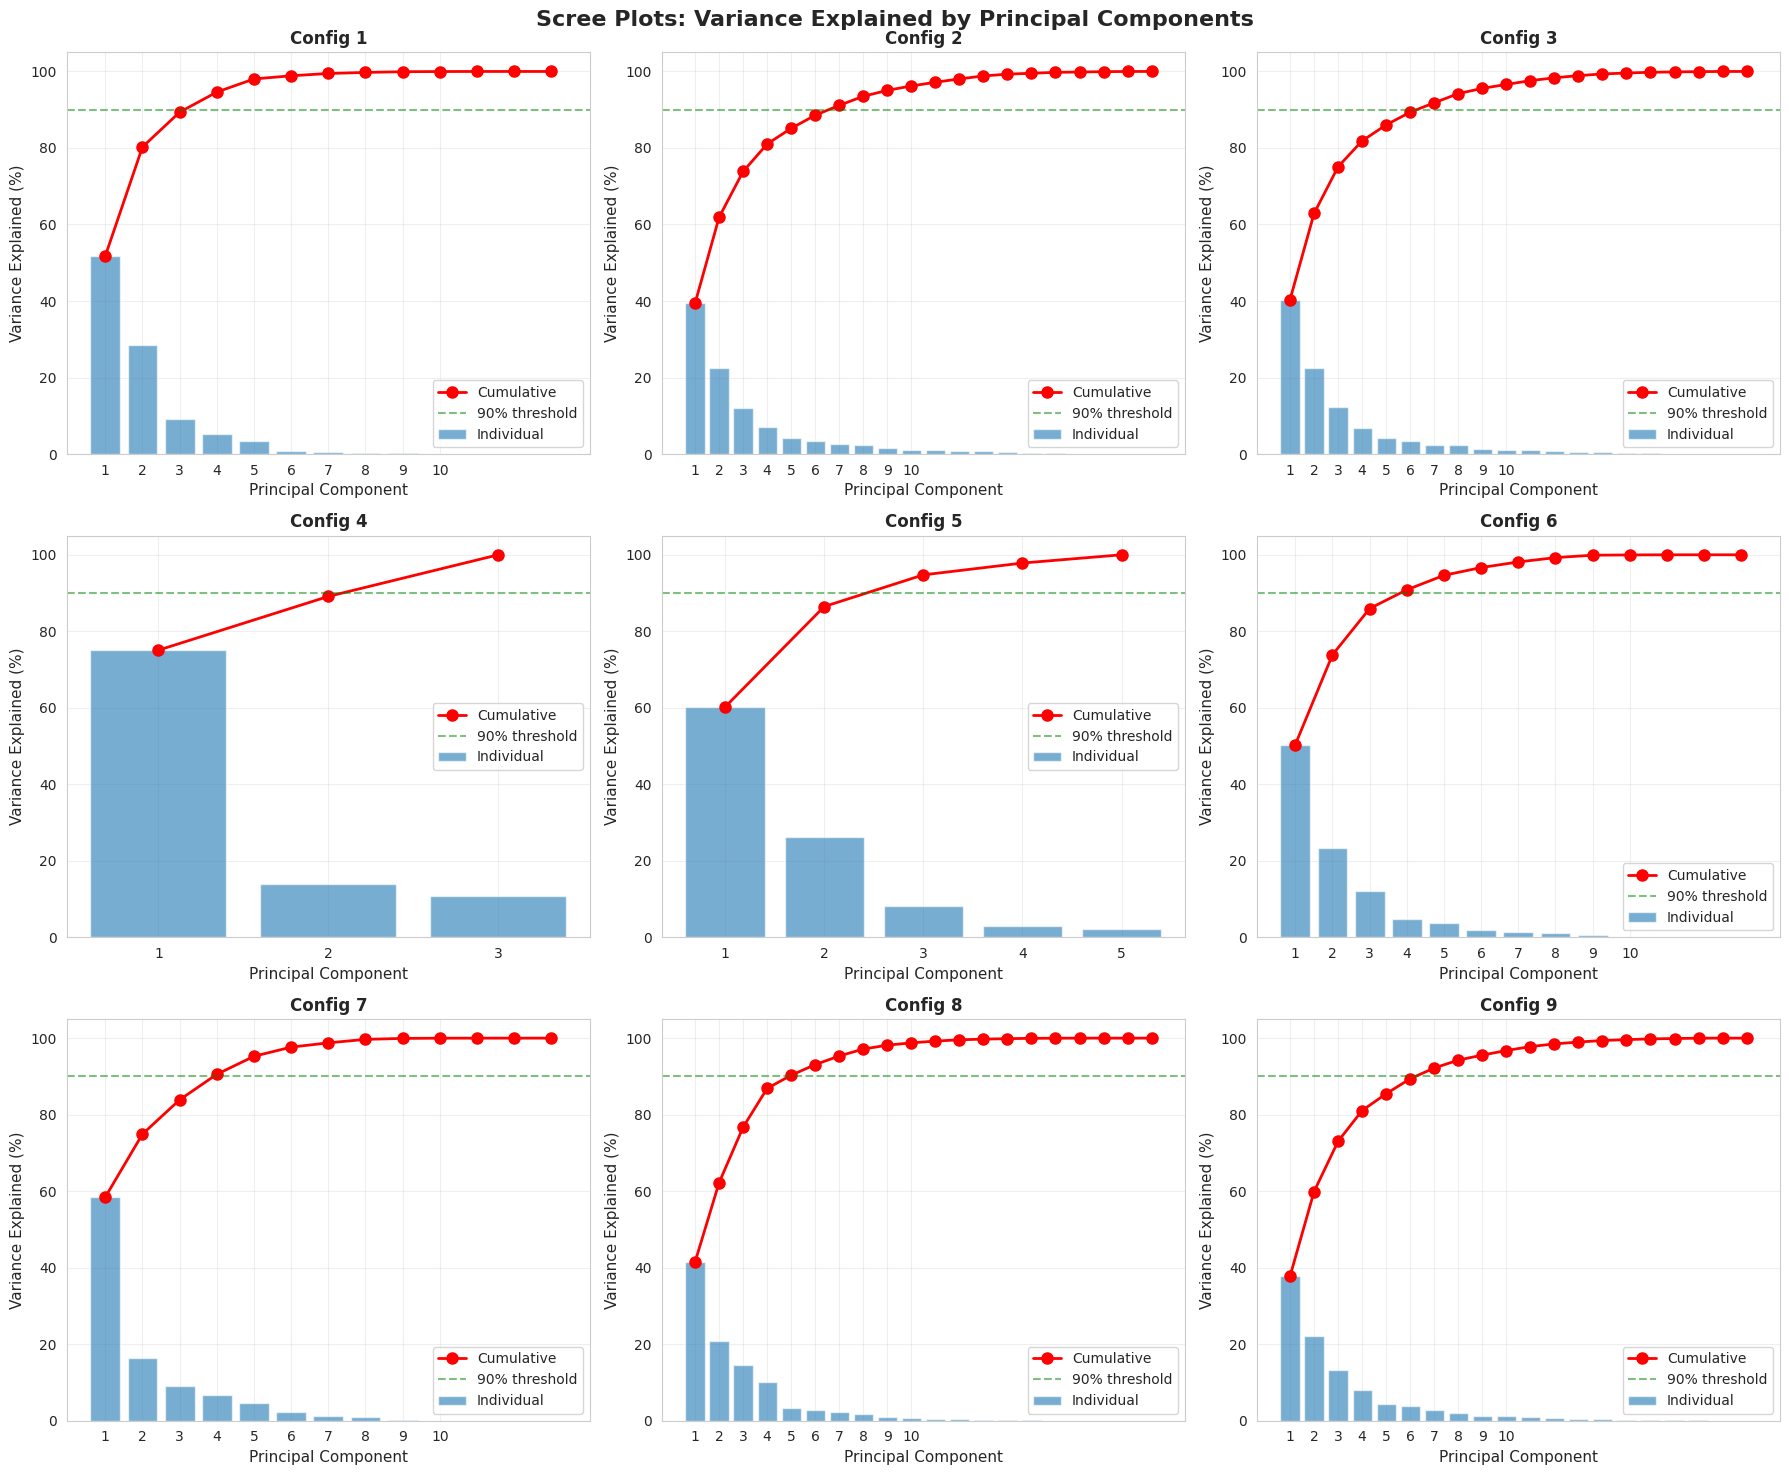

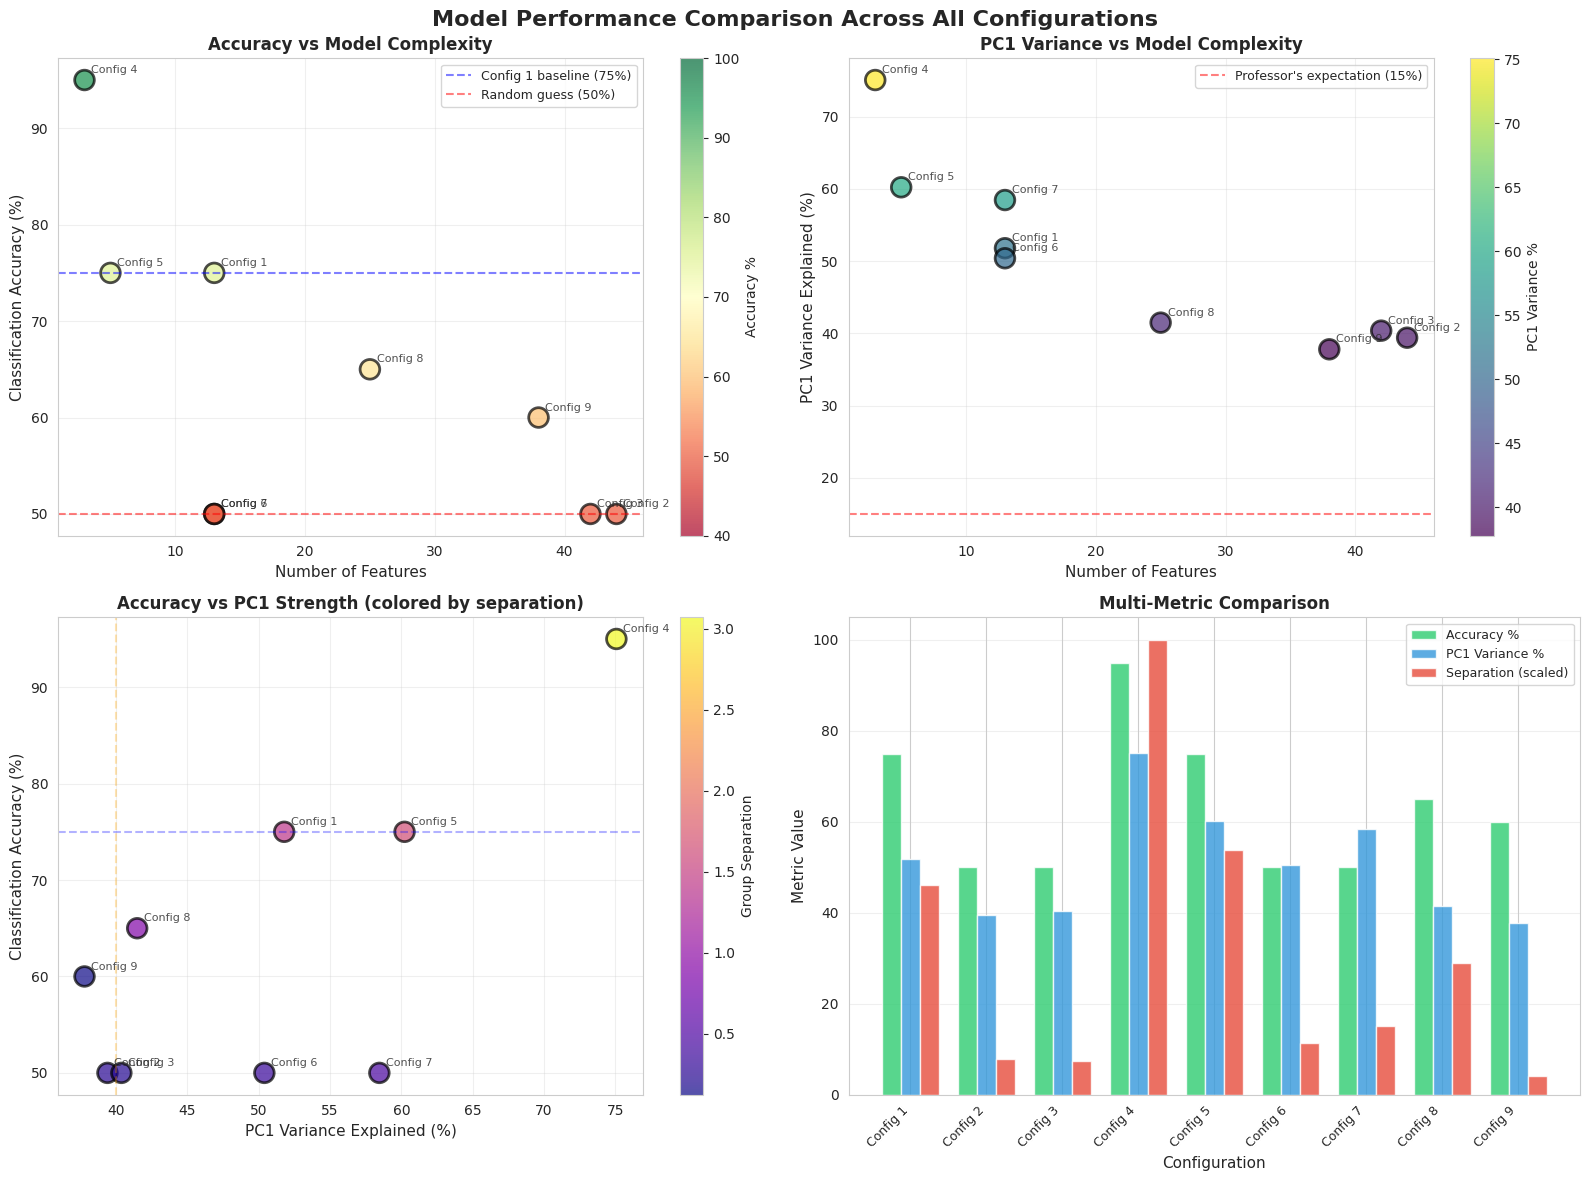

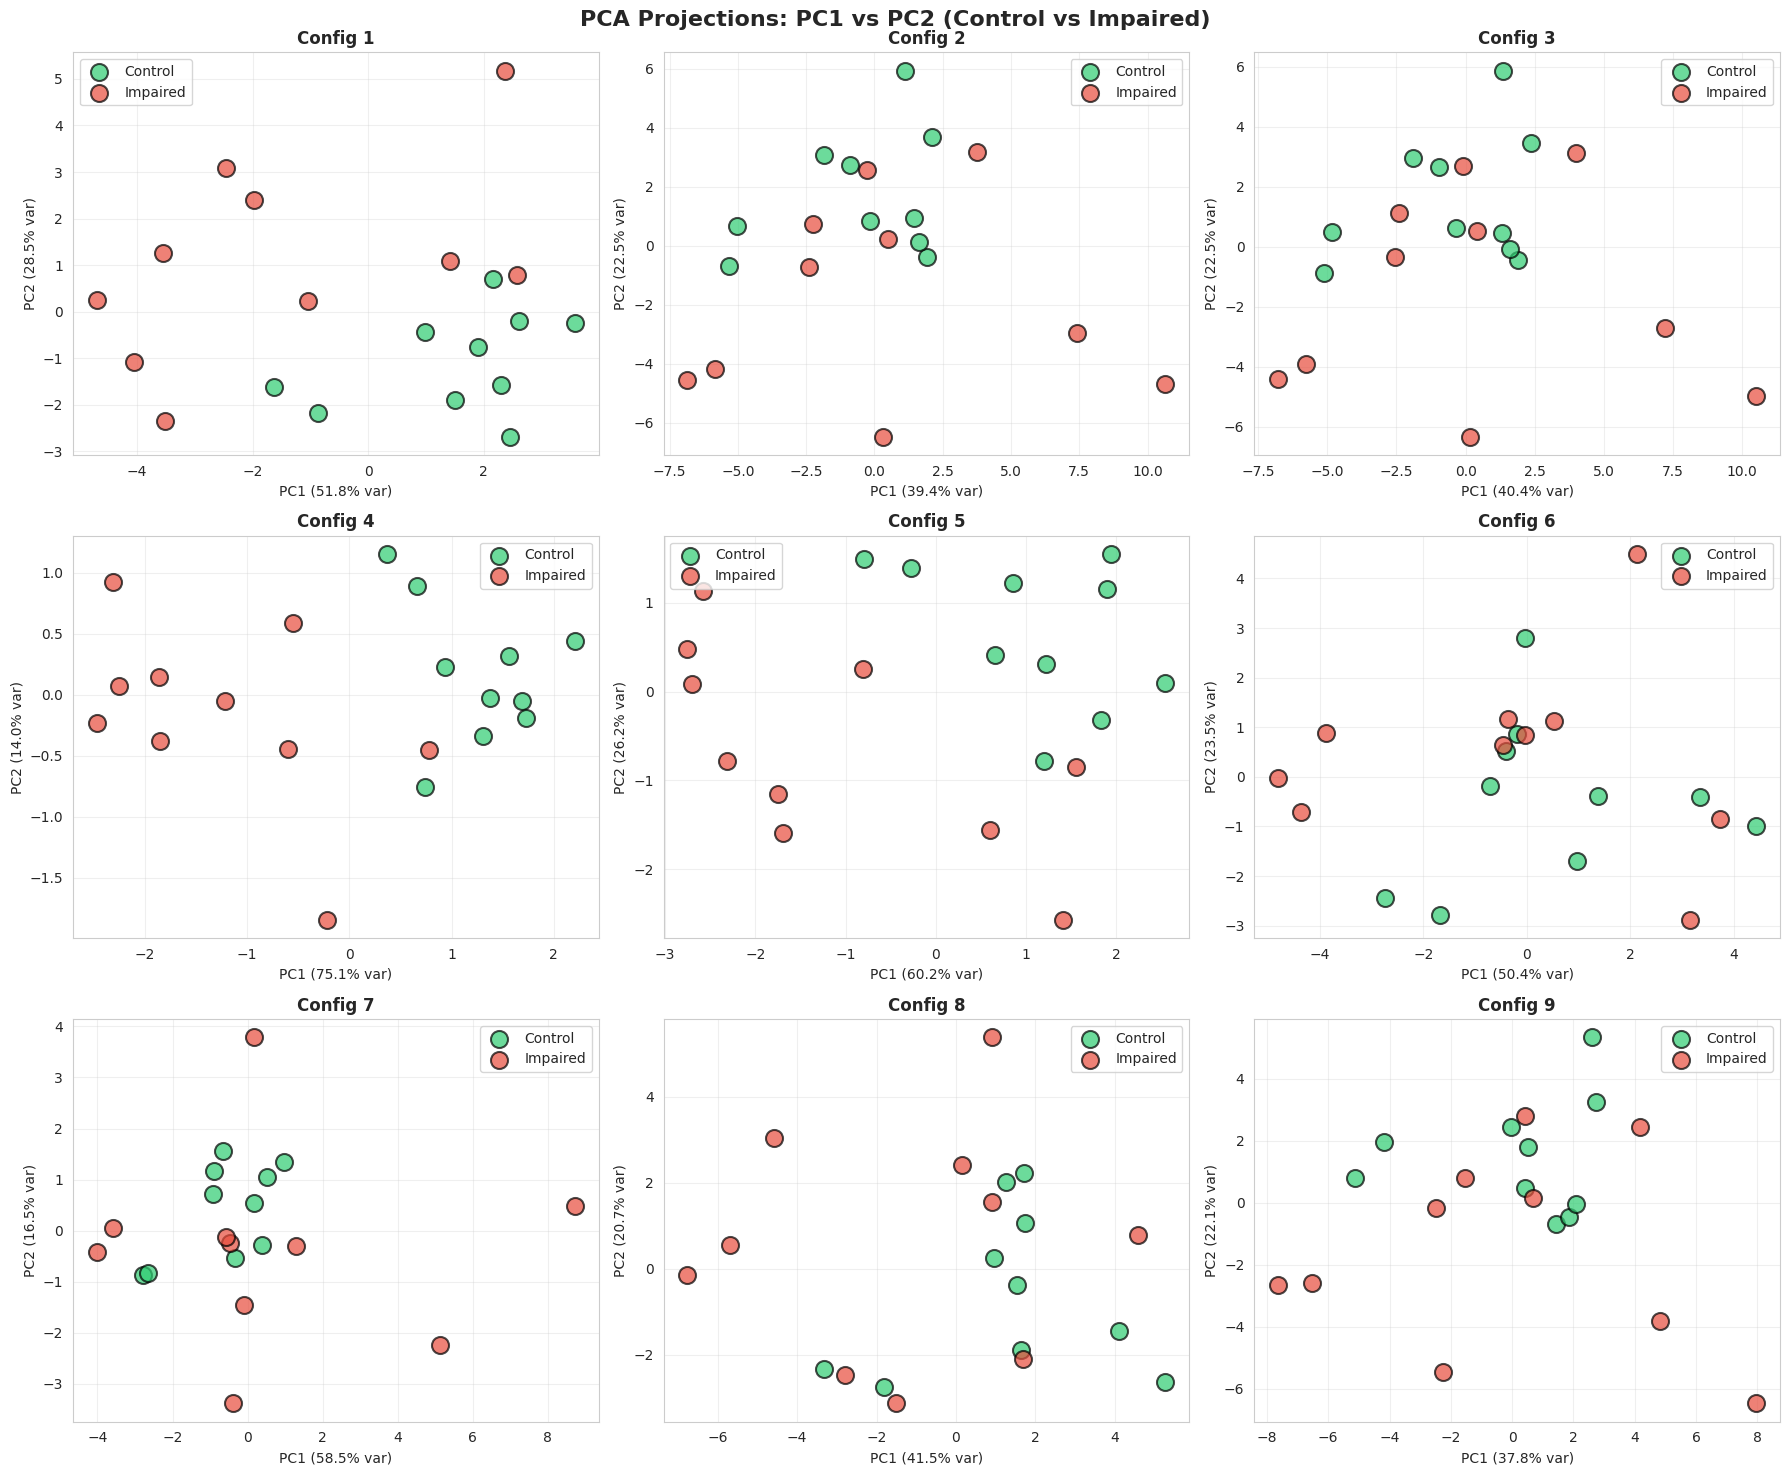

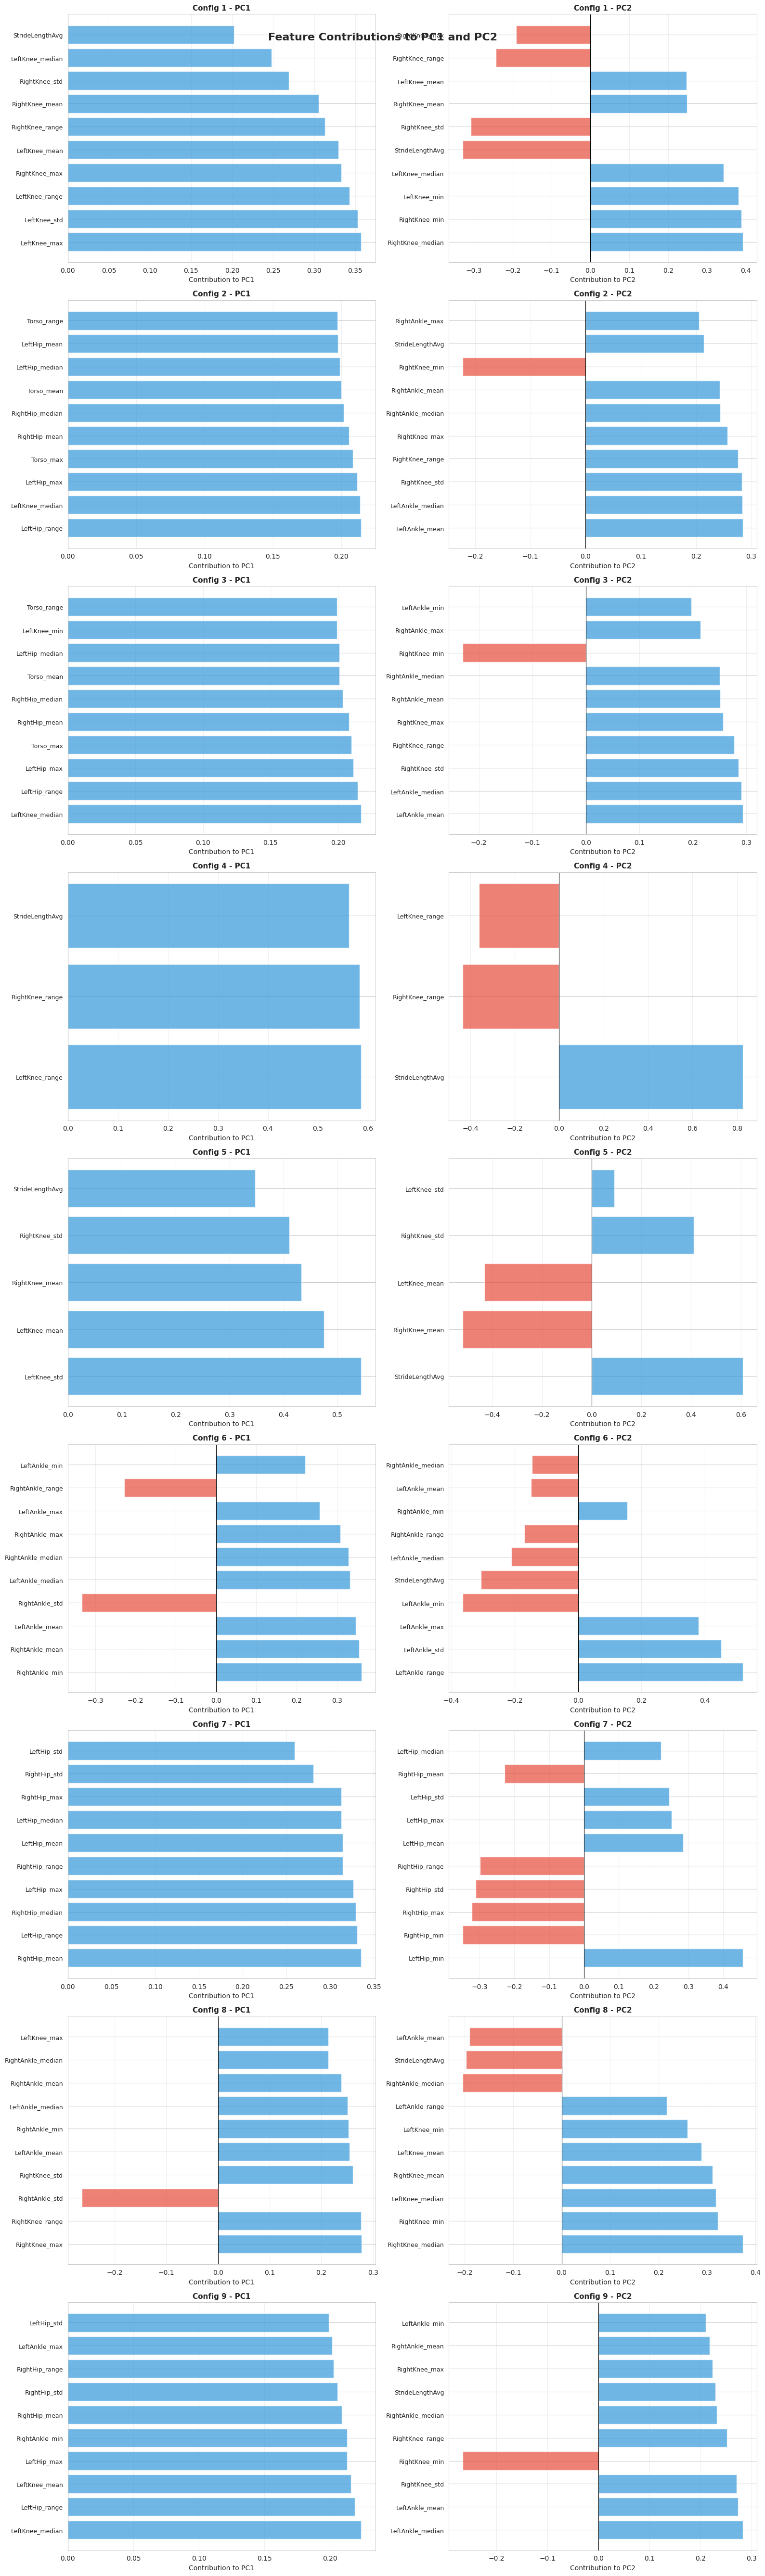

In [ ]:

# ============================================================================
# Test Multiple Feature Configurations
# ============================================================================

# Define feature sets
knee_stats = ['mean', 'std', 'min', 'max', 'range', 'median']
knee_features = ([f'LeftKnee_{s}' for s in knee_stats] +
                 [f'RightKnee_{s}' for s in knee_stats])

all_joint_features = []
joints = ['LeftAnkle', 'LeftHip', 'LeftKnee', 'RightAnkle', 'RightHip', 'RightKnee', 'Torso']
for joint in joints:
    for stat in knee_stats:
        all_joint_features.append(f'{joint}_{stat}')

# Configuration definitions
configs = {
    'Config 1: Knees + Stride (Original)': knee_features + ['StrideLengthAvg'],
    'Config 2: All Joints + Stride': all_joint_features + ['StrideLengthAvg', 'Height'],
    'Config 3: All Joints Only': all_joint_features,

    'Config 4: Knee Range Only': [f'LeftKnee_range', f'RightKnee_range', 'StrideLengthAvg'],
    'Config 5: Knee Mean + Std': [f'LeftKnee_mean', f'RightKnee_mean',
                                   f'LeftKnee_std', f'RightKnee_std', 'StrideLengthAvg'],

    'Config 6: Ankles + Stride': ([f'LeftAnkle_{s}' for s in knee_stats] +
                                   [f'RightAnkle_{s}' for s in knee_stats] +
                                   ['StrideLengthAvg']),
    'Config 7: Hips + Stride': ([f'LeftHip_{s}' for s in knee_stats] +
                                [f'RightHip_{s}' for s in knee_stats] +
                                ['StrideLengthAvg']),

    'Config 8: Knees + Ankles + Stride': (knee_features +
                                          [f'LeftAnkle_{s}' for s in knee_stats] +
                                          [f'RightAnkle_{s}' for s in knee_stats] +
                                          ['StrideLengthAvg']),
    'Config 9: Lower Body (No Torso)': ([f'{joint}_{s}' for joint in ['LeftAnkle', 'LeftHip', 'LeftKnee',
                                                                        'RightAnkle', 'RightHip', 'RightKnee']
                                         for s in knee_stats] +
                                        ['StrideLengthAvg', 'Height'])
}

print("\n" + "="*80)
print("FEATURE CONFIGURATIONS")
print("="*80)
for name, features in configs.items():
    print(f"\n{name}: {len(features)} features")
    print(f"  Features: {features[:3]}... (+{len(features)-3} more)")

# ============================================================================
# Standardization - Use StandardScaler
# ============================================================================

def perform_pca_analysis(df, feature_cols, config_name):
    """
    Perform PCA analysis on selected features.
    Returns: pca model, transformed data, scaler, and results dict
    """
    print(f"\n{'='*80}")
    print(f"{config_name}")
    print(f"{'='*80}")

    # Prepare data
    X = df[feature_cols].values
    y = df['Group'].values
    participant_ids = df['ParticipantID'].values

    # Check for missing values
    if np.any(np.isnan(X)):
        print(f"⚠ Warning: Found {np.sum(np.isnan(X))} missing values. Filling with column means.")
        X = np.nan_to_num(X, nan=np.nanmean(X, axis=0))

    # Standardize
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    print(f"✓ Standardized features (mean=0, std=1)")

    # PCA - keep all components to see full variance
    pca = PCA()
    X_pca = pca.fit_transform(X_scaled)

    # Calculate variance explained
    variance_ratios = pca.explained_variance_ratio_
    cumulative_variance = np.cumsum(variance_ratios)

    print(f"\nVariance Explained:")
    print(f"  PC1: {variance_ratios[0]*100:.2f}%")
    print(f"  PC2: {variance_ratios[1]*100:.2f}%")
    print(f"  PC1+PC2: {cumulative_variance[1]*100:.2f}%")
    print(f"  First 3 PCs: {cumulative_variance[2]*100:.2f}%")

    # Find how many PCs needed for 90%, 95%, 99%
    for threshold in [0.90, 0.95, 0.99]:
        n_components = np.argmax(cumulative_variance >= threshold) + 1
        print(f"  {threshold*100:.0f}% variance: {n_components} components")

    results = {
        'pca': pca,
        'X_pca': X_pca,
        'scaler': scaler,
        'variance_ratios': variance_ratios,
        'cumulative_variance': cumulative_variance,
        'labels': y,
        'participant_ids': participant_ids,
        'feature_names': feature_cols
    }

    return results

# Run PCA for all configurations
pca_results = {}
for config_name, feature_cols in configs.items():
    pca_results[config_name] = perform_pca_analysis(df_full, feature_cols, config_name)

# ============================================================================
# VISUALIZATIONS
# ============================================================================

# 1. Scree Plots - Variance Explained
n_configs = len(pca_results)
n_cols = 3
n_rows = (n_configs + n_cols - 1) // n_cols  # Ceiling division
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
fig.suptitle('Scree Plots: Variance Explained by Principal Components', fontsize=16, fontweight='bold')

# Flatten axes array for easier indexing
if n_rows == 1:
    axes = axes.reshape(1, -1)
axes_flat = axes.flatten()

for idx, (config_name, results) in enumerate(pca_results.items()):
    ax = axes_flat[idx]
    n_components = len(results['variance_ratios'])

    # Plot individual variance
    ax.bar(range(1, n_components+1), results['variance_ratios']*100, alpha=0.6, label='Individual')

    # Plot cumulative variance
    ax.plot(range(1, n_components+1), results['cumulative_variance']*100,
            'ro-', linewidth=2, markersize=8, label='Cumulative')

    # Add reference line at 90%
    ax.axhline(y=90, color='green', linestyle='--', alpha=0.5, label='90% threshold')

    ax.set_xlabel('Principal Component', fontsize=11)
    ax.set_ylabel('Variance Explained (%)', fontsize=11)
    ax.set_title(config_name.split(':')[0], fontsize=12, fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.set_xticks(range(1, min(n_components+1, 11)))

plt.tight_layout()
plt.show()

# 4. Performance Comparison Chart
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Model Performance Comparison Across All Configurations', fontsize=16, fontweight='bold')

# Extract metrics for plotting
config_names = [name.split(':')[0] for name in pca_results.keys()]
n_features = [len(results['feature_names']) for results in pca_results.values()]
pc1_vars = [results['variance_ratios'][0] * 100 for results in pca_results.values()]
accuracies = []
separations = []

for results in pca_results.values():
    pc1_scores = results['X_pca'][:, 0]
    labels = results['labels']
    control_mean = np.mean(pc1_scores[labels == 'Control'])
    impaired_mean = np.mean(pc1_scores[labels == 'Impaired'])
    threshold = (control_mean + impaired_mean) / 2
    predictions = ['Control' if score > threshold else 'Impaired' for score in pc1_scores]
    accuracy = sum([pred == true for pred, true in zip(predictions, labels)]) / len(labels) * 100
    accuracies.append(accuracy)

    control_scores = pc1_scores[labels == 'Control']
    impaired_scores = pc1_scores[labels == 'Impaired']
    separation = abs(control_mean - impaired_mean) / np.sqrt((np.std(control_scores)**2 + np.std(impaired_scores)**2) / 2)
    separations.append(separation)

# Plot 1: Accuracy vs Number of Features
ax1 = axes[0, 0]
colors_by_accuracy = plt.cm.RdYlGn(np.array(accuracies) / 100)
scatter1 = ax1.scatter(n_features, accuracies, s=200, c=accuracies, cmap='RdYlGn',
                       vmin=40, vmax=100, alpha=0.7, edgecolors='black', linewidth=2)
for i, name in enumerate(config_names):
    ax1.annotate(name, (n_features[i], accuracies[i]), fontsize=8,
                xytext=(5, 5), textcoords='offset points', alpha=0.8)
ax1.axhline(y=75, color='blue', linestyle='--', alpha=0.5, label='Config 1 baseline (75%)')
ax1.axhline(y=50, color='red', linestyle='--', alpha=0.5, label='Random guess (50%)')
ax1.set_xlabel('Number of Features', fontsize=11)
ax1.set_ylabel('Classification Accuracy (%)', fontsize=11)
ax1.set_title('Accuracy vs Model Complexity', fontsize=12, fontweight='bold')
ax1.legend(fontsize=9)
ax1.grid(True, alpha=0.3)
plt.colorbar(scatter1, ax=ax1, label='Accuracy %')

# Plot 2: PC1 Variance vs Number of Features
ax2 = axes[0, 1]
scatter2 = ax2.scatter(n_features, pc1_vars, s=200, c=pc1_vars, cmap='viridis',
                       alpha=0.7, edgecolors='black', linewidth=2)
for i, name in enumerate(config_names):
    ax2.annotate(name, (n_features[i], pc1_vars[i]), fontsize=8,
                xytext=(5, 5), textcoords='offset points', alpha=0.8)
ax2.axhline(y=15, color='red', linestyle='--', alpha=0.5, label="Professor's expectation (15%)")
ax2.set_xlabel('Number of Features', fontsize=11)
ax2.set_ylabel('PC1 Variance Explained (%)', fontsize=11)
ax2.set_title('PC1 Variance vs Model Complexity', fontsize=12, fontweight='bold')
ax2.legend(fontsize=9)
ax2.grid(True, alpha=0.3)
plt.colorbar(scatter2, ax=ax2, label='PC1 Variance %')

# Plot 3: Accuracy vs PC1 Variance (Efficiency)
ax3 = axes[1, 0]
scatter3 = ax3.scatter(pc1_vars, accuracies, s=200, c=separations, cmap='plasma',
                      alpha=0.7, edgecolors='black', linewidth=2)
for i, name in enumerate(config_names):
    ax3.annotate(name, (pc1_vars[i], accuracies[i]), fontsize=8,
                xytext=(5, 5), textcoords='offset points', alpha=0.8)
ax3.axhline(y=75, color='blue', linestyle='--', alpha=0.3)
ax3.axvline(x=40, color='orange', linestyle='--', alpha=0.3)
ax3.set_xlabel('PC1 Variance Explained (%)', fontsize=11)
ax3.set_ylabel('Classification Accuracy (%)', fontsize=11)
ax3.set_title('Accuracy vs PC1 Strength (colored by separation)', fontsize=12, fontweight='bold')
ax3.grid(True, alpha=0.3)
plt.colorbar(scatter3, ax=ax3, label='Group Separation')

# Plot 4: Bar chart of all metrics
ax4 = axes[1, 1]
x = np.arange(len(config_names))
width = 0.25

# Normalize metrics to 0-100 scale for comparison
norm_accuracy = np.array(accuracies)
norm_pc1 = np.array(pc1_vars)
norm_separation = (np.array(separations) / max(separations)) * 100

bars1 = ax4.bar(x - width, norm_accuracy, width, label='Accuracy %', alpha=0.8, color='#2ecc71')
bars2 = ax4.bar(x, norm_pc1, width, label='PC1 Variance %', alpha=0.8, color='#3498db')
bars3 = ax4.bar(x + width, norm_separation, width, label='Separation (scaled)', alpha=0.8, color='#e74c3c')

ax4.set_xlabel('Configuration', fontsize=11)
ax4.set_ylabel('Metric Value', fontsize=11)
ax4.set_title('Multi-Metric Comparison', fontsize=12, fontweight='bold')
ax4.set_xticks(x)
ax4.set_xticklabels(config_names, rotation=45, ha='right', fontsize=9)
ax4.legend(fontsize=9)
ax4.grid(True, alpha=0.3, axis='y')
ax4.set_ylim(0, 105)

plt.tight_layout()
plt.show()

# 2. PCA Scatter Plots - PC1 vs PC2
# Dynamically set grid based on how many configs you have
n_configs = len(pca_results)
n_cols = 3
n_rows = int(np.ceil(n_configs / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 5 * n_rows))
fig.suptitle('PCA Projections: PC1 vs PC2 (Control vs Impaired)', fontsize=16, fontweight='bold')

colors = {'Control': '#2ecc71', 'Impaired': '#e74c3c'}

axes = axes.flatten()

for idx, (config_name, results) in enumerate(pca_results.items()):
    ax = axes[idx]
    for group in ['Control', 'Impaired']:
        mask = results['labels'] == group
        ax.scatter(results['X_pca'][mask, 0],
                   results['X_pca'][mask, 1],
                   c=colors[group],
                   label=group,
                   s=150,
                   alpha=0.7,
                   edgecolors='black',
                   linewidth=1.5)
    ax.set_title(config_name.split(':')[0], fontsize=12, fontweight='bold')
    ax.set_xlabel(f'PC1 ({results["variance_ratios"][0]*100:.1f}% var)')
    ax.set_ylabel(f'PC2 ({results["variance_ratios"][1]*100:.1f}% var)')
    ax.legend()
    ax.grid(True, alpha=0.3)

# Hide unused subplots
for j in range(idx + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


# 3. Feature Importance - Top Contributing Features to PC1 and PC2
fig, axes = plt.subplots(n_configs, 2, figsize=(16, 6 * n_configs))
fig.suptitle('Feature Contributions to PC1 and PC2', fontsize=16, fontweight='bold')

# Handle single row case
if n_configs == 1:
    axes = axes.reshape(1, -1)

for idx, (config_name, results) in enumerate(pca_results.items()):
    # PC1 contributions
    ax1 = axes[idx, 0]
    pc1_components = results['pca'].components_[0]
    top_indices = np.argsort(np.abs(pc1_components))[-10:][::-1]

    feature_names = [results['feature_names'][i] for i in top_indices]
    contributions = [pc1_components[i] for i in top_indices]

    colors_bar = ['#3498db' if c > 0 else '#e74c3c' for c in contributions]
    ax1.barh(range(len(contributions)), contributions, color=colors_bar, alpha=0.7)
    ax1.set_yticks(range(len(feature_names)))
    ax1.set_yticklabels(feature_names, fontsize=9)
    ax1.set_xlabel('Contribution to PC1', fontsize=10)
    ax1.set_title(f'{config_name.split(":")[0]} - PC1', fontsize=11, fontweight='bold')
    ax1.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
    ax1.grid(True, alpha=0.3, axis='x')

    # PC2 contributions
    ax2 = axes[idx, 1]
    pc2_components = results['pca'].components_[1]
    top_indices = np.argsort(np.abs(pc2_components))[-10:][::-1]

    feature_names = [results['feature_names'][i] for i in top_indices]
    contributions = [pc2_components[i] for i in top_indices]

    colors_bar = ['#3498db' if c > 0 else '#e74c3c' for c in contributions]
    ax2.barh(range(len(contributions)), contributions, color=colors_bar, alpha=0.7)
    ax2.set_yticks(range(len(feature_names)))
    ax2.set_yticklabels(feature_names, fontsize=9)
    ax2.set_xlabel('Contribution to PC2', fontsize=10)
    ax2.set_title(f'{config_name.split(":")[0]} - PC2', fontsize=11, fontweight='bold')
    ax2.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
    ax2.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()



In [ ]:
# ============================================================================
# Classification Performance
# ============================================================================

print("\n" + "="*80)
print("CLASSIFICATION ANALYSIS - Using PC1 as Gait Score")
print("="*80)

for config_name, results in pca_results.items():
    print(f"\n{config_name}")
    print("-" * 80)

    pc1_scores = results['X_pca'][:, 0]
    labels = results['labels']
    pids = results['participant_ids']

    # Calculate mean PC1 for each group
    control_mask = labels == 'Control'
    impaired_mask = labels == 'Impaired'

    control_scores = pc1_scores[control_mask]
    impaired_scores = pc1_scores[impaired_mask]

    print(f"Control PC1:  mean={np.mean(control_scores):.3f}, std={np.std(control_scores):.3f}")
    print(f"Impaired PC1: mean={np.mean(impaired_scores):.3f}, std={np.std(impaired_scores):.3f}")

    # Find optimal threshold (midpoint between means)
    threshold = (np.mean(control_scores) + np.mean(impaired_scores)) / 2
    print(f"\nOptimal threshold: {threshold:.3f}")

    # Classify based on threshold
    # Assume: PC1 > threshold = Control, PC1 <= threshold = Impaired
    predictions = ['Control' if score > threshold else 'Impaired' for score in pc1_scores]

    # Calculate accuracy
    correct = sum([pred == true for pred, true in zip(predictions, labels)])
    accuracy = correct / len(labels) * 100

    print(f"Accuracy: {accuracy:.1f}% ({correct}/{len(labels)} correct)")

    # Show misclassifications
    misclassified = [(pid, true, pred, score)
                    for pid, true, pred, score in zip(pids, labels, predictions, pc1_scores)
                    if true != pred]

    if misclassified:
        print(f"\nMisclassified ({len(misclassified)}):")
        for pid, true, pred, score in misclassified:
            print(f"  {pid}: True={true}, Predicted={pred}, PC1={score:.3f}")
    else:
        print("\n✓ Perfect classification!")




CLASSIFICATION ANALYSIS - Using PC1 as Gait Score

Config 1: Knees + Stride (Original)
--------------------------------------------------------------------------------
Control PC1:  mean=1.497, std=1.529
Impaired PC1: mean=-1.497, std=2.579

Optimal threshold: -0.000
Accuracy: 75.0% (15/20 correct)

Misclassified (5):
  c5: True=Control, Predicted=Impaired, PC1=-1.635
  c6: True=Control, Predicted=Impaired, PC1=-0.865
  i1: True=Impaired, Predicted=Control, PC1=1.421
  i3: True=Impaired, Predicted=Control, PC1=2.366
  i9: True=Impaired, Predicted=Control, PC1=2.571

Config 2: All Joints + Stride
--------------------------------------------------------------------------------
Control PC1:  mean=-0.503, std=2.640
Impaired PC1: mean=0.503, std=5.215

Optimal threshold: -0.000
Accuracy: 50.0% (10/20 correct)

Misclassified (10):
  c4: True=Control, Predicted=Impaired, PC1=-0.153
  c5: True=Control, Predicted=Impaired, PC1=-5.308
  c6: True=Control, Predicted=Impaired, PC1=-5.049
  c7: Tru

In [ ]:
# ============================================================================
# COMPARISON SUMMARY
# ============================================================================

print("\n" + "="*80)
print("SUMMARY: Comparison Across All Configurations")
print("="*80)

summary_data = []
for config_name, results in pca_results.items():
    pc1_variance = results['variance_ratios'][0] * 100
    pc2_variance = results['variance_ratios'][1] * 100
    total_2pc = results['cumulative_variance'][1] * 100
    n_for_90 = np.argmax(results['cumulative_variance'] >= 0.90) + 1

    # Calculate classification accuracy
    pc1_scores = results['X_pca'][:, 0]
    labels = results['labels']
    control_mean = np.mean(pc1_scores[labels == 'Control'])
    impaired_mean = np.mean(pc1_scores[labels == 'Impaired'])
    threshold = (control_mean + impaired_mean) / 2
    predictions = ['Control' if score > threshold else 'Impaired' for score in pc1_scores]
    accuracy = sum([pred == true for pred, true in zip(predictions, labels)]) / len(labels) * 100

    # Calculate separation (how far apart are the groups?)
    control_scores = pc1_scores[labels == 'Control']
    impaired_scores = pc1_scores[labels == 'Impaired']
    separation = abs(control_mean - impaired_mean) / np.sqrt((np.std(control_scores)**2 + np.std(impaired_scores)**2) / 2)

    summary_data.append({
        'Configuration': config_name.split(':')[0],
        'N Features': len(results['feature_names']),
        'PC1 Var %': f'{pc1_variance:.1f}',
        'PC2 Var %': f'{pc2_variance:.1f}',
        'PC1+PC2 %': f'{total_2pc:.1f}',
        'PCs for 90%': n_for_90,
        'Accuracy %': f'{accuracy:.1f}',
        'Separation': f'{separation:.2f}'
    })

summary_df = pd.DataFrame(summary_data)
# Sort by accuracy
summary_df_sorted = summary_df.sort_values('Accuracy %', ascending=False)
print("\n", summary_df_sorted.to_string(index=False))

# Find best models
print("\n" + "="*80)
print("TOP PERFORMERS")
print("="*80)
best_accuracy_idx = summary_df['Accuracy %'].astype(str).str.rstrip('%').astype(float).idxmax()
best_pc1_idx = summary_df['PC1 Var %'].astype(str).str.rstrip('%').astype(float).idxmax()
most_efficient_idx = summary_df['PCs for 90%'].astype(int).idxmin()


SUMMARY: Comparison Across All Configurations

 Configuration  N Features PC1 Var % PC2 Var % PC1+PC2 %  PCs for 90% Accuracy % Separation
     Config 4           3      75.1      14.0      89.1            3       95.0       3.07
     Config 1          13      51.8      28.5      80.3            4       75.0       1.41
     Config 5           5      60.2      26.2      86.5            3       75.0       1.65
     Config 8          25      41.5      20.7      62.2            5       65.0       0.89
     Config 9          38      37.8      22.1      59.9            7       60.0       0.13
     Config 2          44      39.4      22.5      61.9            7       50.0       0.24
     Config 3          42      40.4      22.5      62.9            7       50.0       0.23
     Config 6          13      50.4      23.5      73.9            4       50.0       0.35
     Config 7          13      58.5      16.5      74.9            4       50.0       0.46

TOP PERFORMERS
